# Shift Offers Analysis

## Project Overview
The purpose of this analysis was to identify signals in the data which are reflective upon a two-sided marketplace with strong network effects, where workers transact with workplaces to book per diem shifts in the future. The intent being to provide stakeholders with initial insights, recommending directions for further inquiry, with a particular analytical focus on worker and workplace behavior within the product. Conducting an analysis on 266k+ records for 07/2024 &ndash; 01/2025, the insights found and detailed can be found in the following summary. 

## Summary of Insights

### 1) Created Shifts & Pay Rate
- **Shifts are only created within January, and from July &ndash; December,** with a pause in creation from February &ndash; June. This could be due to missing data, impacting the insights found - it's highly advised to confirm with Data Engineering or applicable stakeholders that there is no unexpected missing data, and what has been collected is accurate.
- **October observes the largest proportion of shifts created,** having ~31% of total shifts created during this time. Historically, July observes a small amount of shifts created (.0011%) with a large spike following from August &ndash; October, before sharply declining in November and having a small rebound into December. This could be due to workplaces accounting for expected increases in patients, due to the proliferation of illness in colder months. Shift deletions and claims follow the same aforementioned pattern.
- **Average MoM pay rate remains relatively steady** as the number of total created shifts fluctuates throughout the year. A sharp increase in creations occur from January &ndash; July due to the apparent pause in created shifts from February &ndash; June. The overall average pay rate is ~\\$24.17; July observes the highest average rate, due to the small proportion of shifts posted, at ~\\$46.22. This subsequently drops to ~\\$24.21 throughout August &ndash; December; however, the pay rate increases on avg. ~\\$0.54 throughout this time, with September's increase in shift creations seemingly inducing a ~\\$1.08 jump from August.

![Figure1](created-shifts.png)
</br></br>

### 2) Consistency in MoM Pay Ranges
- **The spread of pay rates is fairly consistent** throughout the year, ranging from \\$21-\\$26. Notably, although July observes little activity in workplaces creating shifts, the range of pay rates that are posted for this month are about double the usual range. Furthermore, while August comes in second for lowest total shifts created, it experiences a higher standard deviation than other months - meaning pay rates can fall far from its average. 

![Figure2](pay-rate-box.png)
</br></br>

### 3) Weekly Concentrations - Shift Creations & Claims
- **Monday &ndash; Friday between the hours of 4pm-11pm observe consistently large concentrations of shift creations & claims.** While there are high concentrations found from the hours of 12am-5am, these are all likely due to workers being more active on the platform before, leading up to, and after, a typical workday, likely in preparation for upcoming shifts throughout the current/future weeks. 
    - *Within created shifts:* **Notably, the highest concentration of created shifts occur on Saturdays at 3am.** Mondays at 5pm, Tuesdays at 6pm and 8pm, comprise the top three most common times for creations during the 4pm-11pm timeblock. There is an instance on Thursdays from 8am-10am, where workplaces have high activity. As this is observed to be a typical downtime, understanding if this activity is contributed by a specific workplace, or subset, will help aid in knowing the likely reason(s) for such a deviation and if more attention to this case is warranted/needed. 
    - *Within claimed shifts:* **Mondays at 8pm comprise the highest concentration for shift claims,** with other claims during the 4pm-11pm timeblock being relatively consistently high. This general pattern seems to track with the flow of the workplace-worker relation in the product, having high-concentrations of created shifts being followed by high concentrations of claimed shifts. Tuesdays at 12am comprise the 2nd highest concentration for claimed shifts, following the observed pattern of worker-activity outside of the typical workday hours. Similarly to the high amount of shifts typically created at 3am on Saturday, claims observe a high period of activity from 3-5am, albeit not its most observed for a specific timeblock. 
- **Throughout the whole week, 6am-1pm has relatively low periods of shift creations & claims**.

![Figure3](shift-concentrations.png)
</br></br>

### 4) Workplace Shift Deletions
- **No workplace deletes more shifts than they create.**
- **~21% of all shifts are deleted,** with ~.07% of these shifts having already been claimed by a worker. Depending on the deletion tolerance of stakeholders, understanding what contributes to a worker deleting a shift can provide direction on product adjustments that may lower the total percentage of shifts being deleted.
- **5% of workplaces nearly delete shifts as much as they create,** one workplace in particular deleting 99.7% of their created shifts, others deleting above 50%. 

![Figure4](table-deletion-ratio.png)
</br></br>

### 5) Recommendations
1. **Validate gap in data from Feb &ndash; Jun,** ensuring that data not found for these months within this dataset is expected. If not, acquiring and including missing data will ensure accuracy of insights found, and subsequent recommendations, for product teams.  
1. **Investigate the large spike of shift creations during the winter months, October in particular.**
    - This may be due to the expectation of a rise in illness during the colder months of the year, as is typically observed of society. Workplaces may be attempting to account for an influx of patients during peak periods.
    - Further corroborating theory on the large spike can potentially provide new avenues for accommodating any flexibility needed in the platform for workplaces, when trying to balance predictions of peak periods and their resulting realities.
2. **Further investigate concentrations of shift creations.**
    - Understanding if specific concentrations are attributed to a select number of workplaces will aid in knowing which workplaces may be highly influential in the data being shown. This is especially true for any concentrations observed which do not follow general patterns - e.g., Thursdays from 8-10am, and Saturdays at 3am for shift creations.
    - Further context will aid in understanding of the contributing factors to a shift being created during certain hours, and can possibly aid in a paired-supplementation of understanding the deletions of shifts observed. 
3. **Understand what contributes to ostensible anomalies in July & August.**
    - With July having such little shifts created and no deletions, but with higher pay rates, it'd prove useful to know what's contributing to this deviation - is it a specific workplace; are there factors about the shifts that contribute to higher rates; do these factors not occur often and is why there is a low amount of these high rate shifts being created? This understanding can be paired with further contextual data on why workplaces decide to post a shift with a certain rate, creating a potential avenue for product improvement by accommodating for the needs of these "unique" shifts.
    - With August following July in the lowest number of shifts created, understanding why it has a higher standard deviation than months with greater number of shifts created can provide a more detailed insight into factors that contribute to pay rate decisions. This would aid in workplace relations by creating a better understanding of shift use-cases/scenarios and continue further informing potential product improvement opportunities. 
3. **Collate qualitative data to understand what factors contribute to a workplace deleting a shift.**
    - While workplaces may be overestimating their workforce needs for peak periods, causing shifts to be subsequently deleted once posted, there may also be mistakes made when a shift is posted which aren't able to be corrected without deleting the shift.
    - Understanding why workplaces delete shifts can potentially provide insight(s) that allows for platform adjustments to be made, decreasing the overall percentage of shifts deleted, and increasing the opportunities available for workers.
</br></br>
#### For a detailed technical understanding of the EDA undergone, please see below:

# **Initial EDA**

In [111]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [112]:
# importing data from Google-hosted table
url='https://docs.google.com/spreadsheets/d/' + '1sGa4oxX3wC2gbGBkUF_G5p_kBzHlKU_p84W9roV7620' + '/export?gid=1708261856&format=csv'
raw_df = pd.read_csv(url, 
                 # setting index to not use first column
                 index_col = False,
                # parse column values to datetime
                 parse_dates=['SHIFT_START_AT', 'SHIFT_CREATED_AT', 'CLAIMED_AT', 'CANCELED_AT', 'DELETED_AT']
                )

In [113]:
# validating import
print(raw_df.shape)
raw_df.head(5)

(266340, 15)


,SHIFT_ID,WORKER_ID,WORKPLACE_ID,SHIFT_START_AT,SHIFT_CREATED_AT,OFFER_VIEWED_AT,DURATION,SLOT,CLAIMED_AT,DELETED_AT,IS_VERIFIED,CANCELED_AT,IS_NCNS,PAY_RATE,CHARGE_RATE
0,6757580b1e2d97752fd69167,65b01f2e46c0645699081cbe,5e7e45243bfbb200165914ae,2024-12-09 23:00:00,2024-12-09 20:50:19,2024-12-09 21:18:42,8,pm,NaT,NaT,False,NaT,False,21.29,29
1,675d37d8a1ca6192a74d23f4,65298a18cc967a5cebbd40b6,5e1ce78827ff480016e9133e,2024-12-14 22:30:00,2024-12-14 07:46:32,2024-12-14 13:19:30,9,pm,NaT,2024-12-14 19:23:43,False,NaT,False,23.23,30
2,67550bddd79613f860549322,6696d1c1d0200bf317ee5d3c,626b0b89596c0601c2c39642,2024-12-08 15:00:00,2024-12-08 03:00:46,2024-12-08 4:04:14,6,am,NaT,NaT,False,NaT,False,21.97,30
3,66f5d05de01fd3697b18c206,66b285d5d0200bf317738e59,5cb9f07135163900163f532c,2024-09-27 14:00:00,2024-09-26 21:21:34,2024-09-27 4:19:45,8,am,NaT,NaT,False,NaT,False,19.05,28
4,66ee3848e62bb5f43e3baee5,620c6429e2ceb601ad203920,611af67795f4c501662edb31,2024-10-08 21:30:00,2024-09-21 03:06:48,2024-10-06 0:46:37,8,pm,NaT,NaT,False,NaT,False,22.13,24


In [114]:
# validating data types
raw_df.dtypes

SHIFT_ID                    object
WORKER_ID                   object
WORKPLACE_ID                object
SHIFT_START_AT      datetime64[ns]
SHIFT_CREATED_AT    datetime64[ns]
OFFER_VIEWED_AT             object
DURATION                     int64
SLOT                        object
CLAIMED_AT          datetime64[ns]
DELETED_AT          datetime64[ns]
IS_VERIFIED                   bool
CANCELED_AT         datetime64[ns]
IS_NCNS                       bool
PAY_RATE                   float64
CHARGE_RATE                  int64
dtype: object

In [115]:
# reviewing basic info
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 266340 entries, 0 to 266339
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype         
---  ------            --------------   -----         
 0   SHIFT_ID          266340 non-null  object        
 1   WORKER_ID         266340 non-null  object        
 2   WORKPLACE_ID      266340 non-null  object        
 3   SHIFT_START_AT    266340 non-null  datetime64[ns]
 4   SHIFT_CREATED_AT  266340 non-null  datetime64[ns]
 5   OFFER_VIEWED_AT   266340 non-null  object        
 6   DURATION          266340 non-null  int64         
 7   SLOT              266340 non-null  object        
 8   CLAIMED_AT        13064 non-null   datetime64[ns]
 9   DELETED_AT        55644 non-null   datetime64[ns]
 10  IS_VERIFIED       266340 non-null  bool          
 11  CANCELED_AT       321 non-null     datetime64[ns]
 12  IS_NCNS           266340 non-null  bool          
 13  PAY_RATE          266340 non-null  float64       
 14  CHAR

In [116]:
# copy of data frame for augmentive use
df = raw_df.copy()

In [117]:
# converting columns to lowercase
df.columns = df.columns.str.lower()

In [118]:
# validating
df.head()

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,is_verified,canceled_at,is_ncns,pay_rate,charge_rate
0,6757580b1e2d97752fd69167,65b01f2e46c0645699081cbe,5e7e45243bfbb200165914ae,2024-12-09 23:00:00,2024-12-09 20:50:19,2024-12-09 21:18:42,8,pm,NaT,NaT,False,NaT,False,21.29,29
1,675d37d8a1ca6192a74d23f4,65298a18cc967a5cebbd40b6,5e1ce78827ff480016e9133e,2024-12-14 22:30:00,2024-12-14 07:46:32,2024-12-14 13:19:30,9,pm,NaT,2024-12-14 19:23:43,False,NaT,False,23.23,30
2,67550bddd79613f860549322,6696d1c1d0200bf317ee5d3c,626b0b89596c0601c2c39642,2024-12-08 15:00:00,2024-12-08 03:00:46,2024-12-08 4:04:14,6,am,NaT,NaT,False,NaT,False,21.97,30
3,66f5d05de01fd3697b18c206,66b285d5d0200bf317738e59,5cb9f07135163900163f532c,2024-09-27 14:00:00,2024-09-26 21:21:34,2024-09-27 4:19:45,8,am,NaT,NaT,False,NaT,False,19.05,28
4,66ee3848e62bb5f43e3baee5,620c6429e2ceb601ad203920,611af67795f4c501662edb31,2024-10-08 21:30:00,2024-09-21 03:06:48,2024-10-06 0:46:37,8,pm,NaT,NaT,False,NaT,False,22.13,24


In [119]:
# summary stats
df.describe()

,shift_start_at,shift_created_at,duration,claimed_at,deleted_at,canceled_at,pay_rate,charge_rate
count,266340,266340,266340.000000,13064,55644,321,266340.000000,266340.000000
mean,2024-11-19 03:22:32.691420672,2024-11-12 17:51:37.541537280,8.342164,2024-11-15 02:20:09.969152,2024-11-14 03:44:18.094655488,2024-11-19 04:40:11.542056448,24.164936,31.511906
min,2024-09-22 00:00:00,2024-07-29 17:36:11,0.000000,2024-07-29 21:41:01,2024-08-26 06:02:46,2024-08-26 05:48:12,16.140000,24.000000
25%,2024-10-16 22:00:00,2024-10-09 23:48:08,8.000000,2024-10-13 22:03:01,2024-10-13 23:40:02,2024-10-15 07:49:44,21.580000,27.000000
50%,2024-11-15 22:30:00,2024-11-05 16:49:28,8.000000,2024-11-13 20:08:32.500000,2024-11-06 08:49:20,2024-11-20 18:25:44,22.520000,31.000000
75%,2024-12-24 14:30:00,2024-12-17 20:21:18,9.000000,2024-12-17 03:58:59.750000128,2024-12-17 18:51:53,2024-12-24 05:35:45,25.100000,36.000000
max,2025-01-20 23:30:00,2025-01-21 23:45:56,18.000000,2025-01-21 23:46:08,2025-01-20 21:00:04,2025-01-19 16:50:09,58.570000,64.000000
std,NaN,NaN,1.155281,NaN,NaN,NaN,4.651970,5.414566


#### Reviewing NaTs

In [120]:
# reviewing NaTs noted from raw_df
print(f'claimed_at NaTs: {df.claimed_at.isna().sum()}')
print(f'deleted_at NaTs: {df.deleted_at.isna().sum()}')
print(f'canceled_at NaTs: {df.canceled_at.isna().sum()}')

claimed_at NaTs: 253276
deleted_at NaTs: 210696
canceled_at NaTs: 266019


#### Reveiewing Dupes

In [121]:
# validating duplicates in shift_id
print(f'num shift_id dupes: {df.shift_id.duplicated().sum()}') #19,900 unique

# validating duplicates in worker_id
print(f'num worker_id dupes: {df.worker_id.duplicated().sum()}') #10,291 unique

# validating duplicates in workplace_id
print(f'num workplace_id dupes: {df.workplace_id.duplicated().sum()}') #132 unique

num shift_id dupes: 246440
num worker_id dupes: 256049
num workplace_id dupes: 266208


#### Time-Series Inclusion of Months & Years

In [122]:
# adding created-month column w/ numeric representation
df['created_month'] = df.shift_created_at.dt.month

# adding created-year column w/ numeric representation
df['created_year'] = df.shift_created_at.dt.year

# adding column for day (named) of shift creation
df['created_day_name'] = df.shift_created_at.dt.day_name()

# adding column for hour of shift creation
df['created_hour'] = df.shift_created_at.dt.hour

# adding deleted-month column w/ numeric representation
df['deleted_month'] = df.deleted_at.dt.month.astype('Int64')

# adding deleted-year column w/ numeric representation
df['deleted_year'] = df.deleted_at.dt.year.astype('Int64')

# adding deleted-month column w/ numeric representation
df['claimed_month'] = df.claimed_at.dt.month.astype('Int64')

# adding deleted-year column w/ numeric representation
df['claimed_year'] = df.claimed_at.dt.year.astype('Int64')

# adding column for day (named) of shift claim
df['claimed_day_name'] = df.claimed_at.dt.day_name()

# adding column for hour of shift claim
df['claimed_hour'] = df.claimed_at.dt.hour

In [123]:
# validating column additions
df.head(2)

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
0,6757580b1e2d97752fd69167,65b01f2e46c0645699081cbe,5e7e45243bfbb200165914ae,2024-12-09 23:00:00,2024-12-09 20:50:19,2024-12-09 21:18:42,8,pm,NaT,NaT,...,12,2024,Monday,20,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,675d37d8a1ca6192a74d23f4,65298a18cc967a5cebbd40b6,5e1ce78827ff480016e9133e,2024-12-14 22:30:00,2024-12-14 07:46:32,2024-12-14 13:19:30,9,pm,NaT,2024-12-14 19:23:43,...,12,2024,Saturday,7,12,2024,<NA>,<NA>,NaN,NaN


In [124]:
# validating data types for new columns
df.dtypes

shift_id                    object
worker_id                   object
workplace_id                object
shift_start_at      datetime64[ns]
shift_created_at    datetime64[ns]
offer_viewed_at             object
duration                     int64
slot                        object
claimed_at          datetime64[ns]
deleted_at          datetime64[ns]
is_verified                   bool
canceled_at         datetime64[ns]
is_ncns                       bool
pay_rate                   float64
charge_rate                  int64
created_month                int32
created_year                 int32
created_day_name            object
created_hour                 int32
deleted_month                Int64
deleted_year                 Int64
claimed_month                Int64
claimed_year                 Int64
claimed_day_name            object
claimed_hour               float64
dtype: object

#### Initial EDA Tracking Doc
1. NaTs in following columns:
   - claimed_at : 253276
   - deleted_at : 210696
   - canceled_at : 266019
2. No NaNs to consider
3. Duplicates in `shift_id`, `worker_id`, `workplace_id` makes sense, as multiple workers can apply for multiple shifts; multiple workplaces can post shifts.
4. Consideration needed for any outliers.
5. Max `shift_created_at` is 01/21/2025 - may want to consider any limitations/normalization of dt columns
6. Likely more interesting to look at any time-series from month perspective, as yearly data is only from 2024-2025 (*could compare using bar graph to start foundational magnitude trends for future data collection*)
7. Can graph pairplot or correlation matrix for investigative direction (will need to handle NAs).
8. `charge_rate` is flat rate (integer).
</br></br>

**Initial Investigative Questions**
1. How many workers are verified *(worker worked shift)* for a shift?
   -  How does this number compare to shifts that have been deleted by a workplace?
2. Any extreme outliers to take notice of?
    - Consider initiating focus on scales of `pay_rate` & `charge_rate`
      - *Any significant magnitudes to take note of?*
3. Frequencies in `deleted_at` : time-series
4. Frequencies in `canceled_at` : time-series
    - e.g. during major holidays; *or perhaps there is an uptick*?
5. Why are min. dates incongruous?
    - `shift_created_at` 07/29/2024 -> `claimed_at` 07/29/2024 -> `shift_start_at` 09/22/2024
       - Why is there a 2 month gap from when a shift was first recorded as being claimed, to the first shift starting? Does this have anything to do with `canceled_at` & `deleted_at` being 08/26/2024? Is this related to the same shift posted; if so, is/are shift(s) related to a specific workplace; how many shifts were created in the 07/2024-08/2024 time-frame?
7. Ranges of `pay_rate` that may hint at user preference(s)?
    - i.e., which ranges show the **most verified** shifts? which ranges show the **most claimed** shifts?

# **Overall Frequencies | Pay Rate & Shifts**
- Investigating the seasonality of pay_rate and noting any coinciding patterns with **overall** trends in shifts

In [125]:
df.head(2)

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
0,6757580b1e2d97752fd69167,65b01f2e46c0645699081cbe,5e7e45243bfbb200165914ae,2024-12-09 23:00:00,2024-12-09 20:50:19,2024-12-09 21:18:42,8,pm,NaT,NaT,...,12,2024,Monday,20,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,675d37d8a1ca6192a74d23f4,65298a18cc967a5cebbd40b6,5e1ce78827ff480016e9133e,2024-12-14 22:30:00,2024-12-14 07:46:32,2024-12-14 13:19:30,9,pm,NaT,2024-12-14 19:23:43,...,12,2024,Saturday,7,12,2024,<NA>,<NA>,NaN,NaN


#### Overall observations by Month

In [126]:
# creating dataframe for counts of creations, deletions, claims, avg. pay_rate, by month
by_month_df = df.groupby(['created_month']).agg(
    {'shift_created_at': 'count',
     'deleted_at': 'count',
     'claimed_at' : 'count',
     'pay_rate' : 'mean'
    }
).reset_index().rename(columns={'created_month' : 'month' ,'shift_created_at' : 'num_creations', 'deleted_at' : 'num_deletions', \
                    'claimed_at' : 'num_claims', 'pay_rate' : 'avg_pay_rate'})

In [127]:
by_month_df.head()

,month,num_creations,num_deletions,num_claims,avg_pay_rate
0,1,35420,5063,1421,24.527619
1,7,3,0,3,46.220000
2,8,1803,689,105,22.574842
3,9,40456,11761,1676,23.649063
4,10,82494,18626,3825,23.847578


Text(0.5, 1.0, 'Monthly Overall Frequency of Shift Creation')

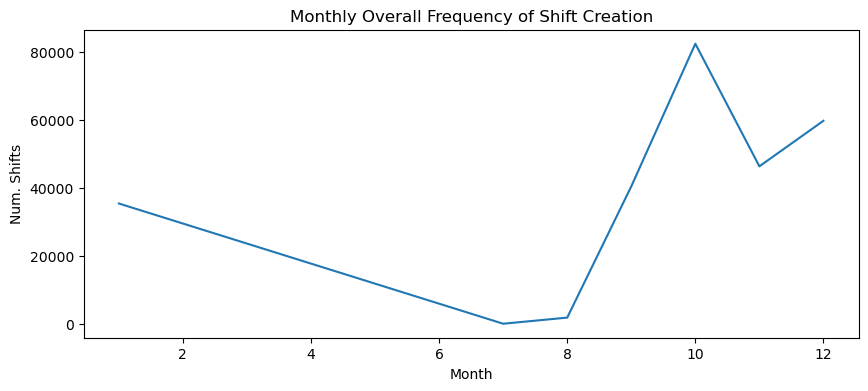

In [128]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(by_month_df, x='month', y='num_creations')

plt.xlabel('Month')
plt.ylabel('Num. Shifts')
plt.title('Monthly Overall Frequency of Shift Creation')

Text(0.5, 1.0, 'Monthly Overall Frequency of Shift Claims')

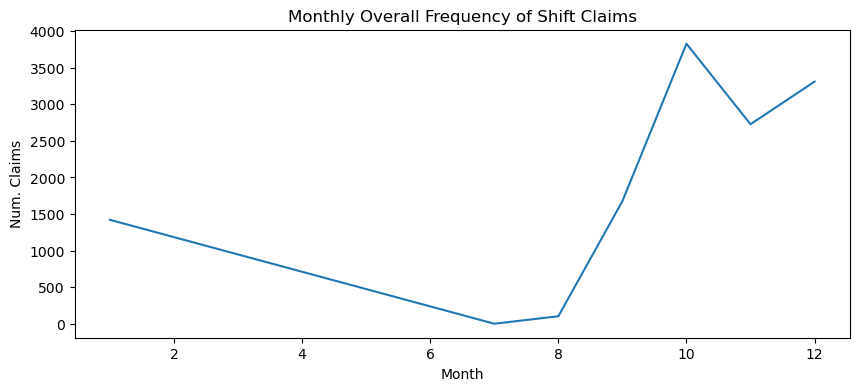

In [129]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(by_month_df, x='month', y='num_claims')

plt.xlabel('Month')
plt.ylabel('Num. Claims')
plt.title('Monthly Overall Frequency of Shift Claims')

Text(0.5, 1.0, 'Monthly Overall Frequency of Shift Deletions')

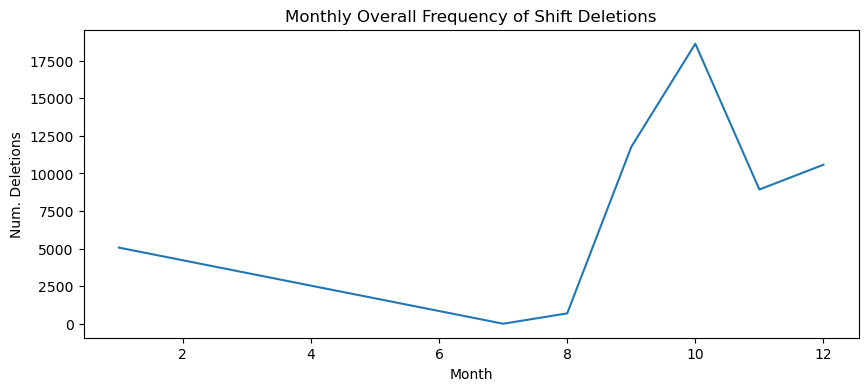

In [130]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(by_month_df, x='month', y='num_deletions')

plt.xlabel('Month')
plt.ylabel('Num. Deletions')
plt.title('Monthly Overall Frequency of Shift Deletions')

Text(0.5, 1.0, 'Monthly Overall Frequency of Avg. Pay Rate')

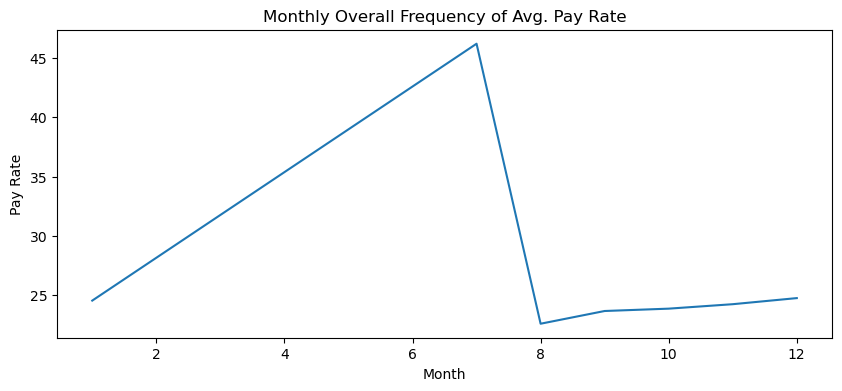

In [131]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(by_month_df, x='month', y='avg_pay_rate')

plt.xlabel('Month')
plt.ylabel('Pay Rate')
plt.title('Monthly Overall Frequency of Avg. Pay Rate')

In [132]:
# count of created shifts by month
df.created_month.value_counts(normalize=True)

created_month
10    0.309732
12    0.224491
11    0.174112
9     0.151896
1     0.132988
8     0.006770
7     0.000011
Name: proportion, dtype: float64

In [133]:
# overall avg. pay_rate
df.pay_rate.mean()

24.164935984080497

In [134]:
# overall avg. pay_rate by month
df.groupby(['created_month'])[['pay_rate']].mean().sort_values(by='pay_rate')

,pay_rate
created_month,
8,22.574842
9,23.649063
10,23.847578
11,24.223727
1,24.527619
12,24.738242
7,46.220000


#### Observations
- Avg. Pay rate looks to be reciprocal to pattern seen in creations, claims, deletions: There is an increase in pay_rate from Jan - Jul, before a sharp decrease heading into August, where the pay begins to slightly increase again. This is interesting given that the pattern for creations, claims, deletions show an overall decline from Jan - July, with July experiencing a small increase heading into August, and a sharp increase occurring from Aug - October, before things decline again (a small increase occurring from Nov-Dec)
- When there are less shifts being created and claimed, the pay rate observes increases; however, as soon as shifts begin to increase in creations, claims, and deletions, the pay rate significantly decreases and then increases in relatively small increments.
- **Shifts are observed to only be created in January, and then from Jul - Dec. No shifts are created from Feb. - Jun.**
    - From this, the avg. MoM pay_rate jumps to high-levels in July when shifts are posted again, before quickly falling to seemingly "normal" levels during the winter months. Avg. pay in July is \\$46.22 compared to Jan. (\\$24.53) and Aug - Dec (\\$24.12) - likely reflecting only 3 shifts being created in July before jumping to the thousands in August. (Overall pay avg. is \\$24.17)

# **Concentrations of Created & Claimed Shifts**

### Created Shifts

In [135]:
# dataframe based on num. of shifts created in specific times of day
created_tod_df = df.groupby(['created_hour','created_day_name'])[['shift_created_at']].count().reset_index()

# pivoting for heatmap plotting
created_tod_df = created_tod_df.pivot(index='created_hour', columns='created_day_name', values='shift_created_at')

# reordering for expected days-of-week order
created_tod_df = created_tod_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

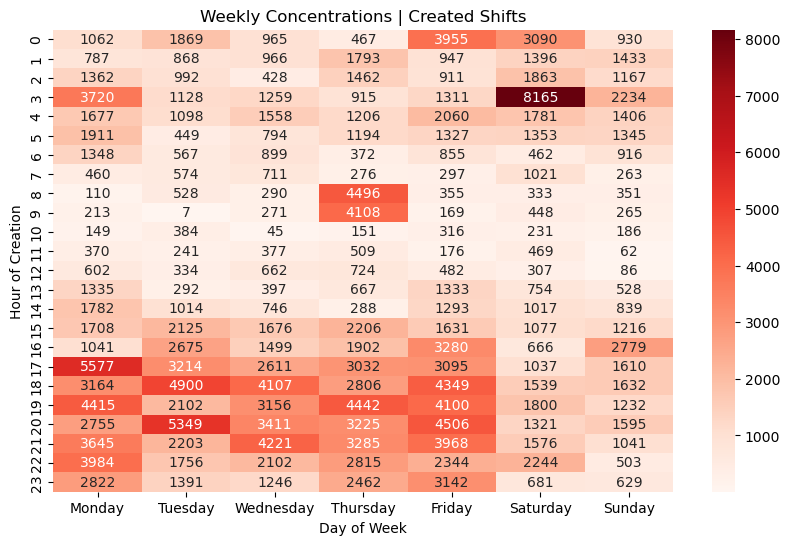

In [136]:
# fig, ax = plt.subplots(figsize=(6,6)) # sizing for screenshot
fig, ax = plt.subplots(figsize=(10,6)) 

# sns.heatmap(created_tod_df, cmap='Reds') # w/o annotations for screenshot
sns.heatmap(created_tod_df, cmap='Reds', annot=True, fmt='g') 

plt.title('Weekly Concentrations | Created Shifts')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Creation')
plt.show()

### Claimed Shifts

In [137]:
# dataframe based on num. of shifts claimed in specific times of day
claimed_tod_df = df.groupby(['claimed_hour','claimed_day_name'])[['claimed_at']].count().reset_index()

# pivoting for heatmap plotting
claimed_tod_df = claimed_tod_df.pivot(index='claimed_hour', columns='claimed_day_name', values='claimed_at')

# reordering for expected days-of-week order
claimed_tod_df = claimed_tod_df[['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']]

# changing hours from float to index
claimed_tod_df.index = claimed_tod_df.index.astype('int')

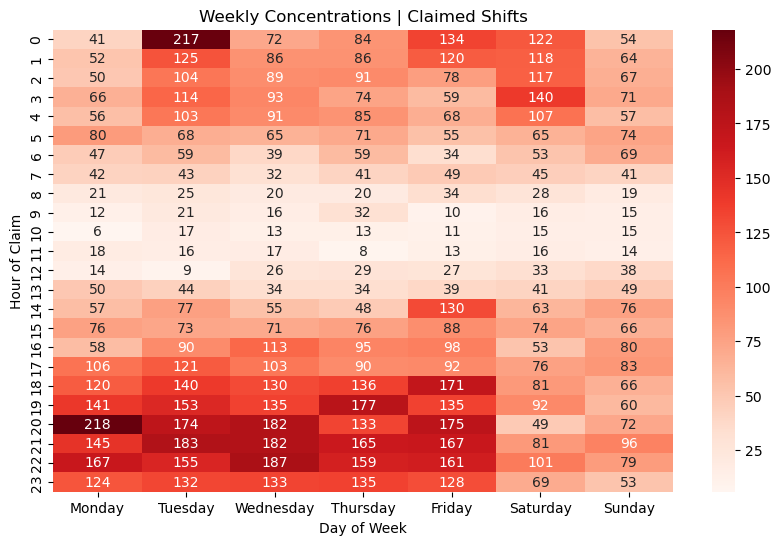

In [138]:
# fig, ax = plt.subplots(figsize=(6,6)) # sizing for screenshot
fig, ax = plt.subplots(figsize=(10,6))

# sns.heatmap(claimed_tod_df, cmap='Reds') # w/o annotations for screenshot
sns.heatmap(claimed_tod_df, cmap='Reds', annot=True, fmt='g')

plt.title('Weekly Concentrations | Claimed Shifts')
plt.xlabel('Day of Week')
plt.ylabel('Hour of Claim')
plt.show()

### Overall Plot

Text(792.3131313131312, 0.5, 'Hour of Claim')

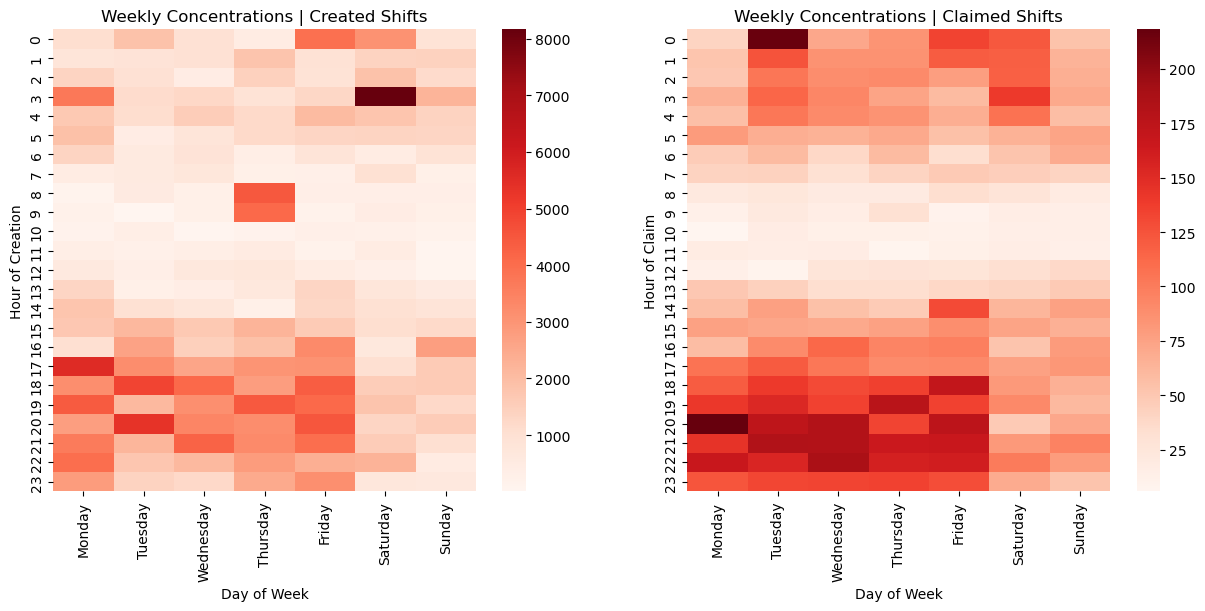

In [139]:
fig, axs = plt.subplots(1,2,figsize=(15,6)) 

# created
sns.heatmap(created_tod_df, cmap='Reds', ax= axs[0]) 

axs[0].set_title('Weekly Concentrations | Created Shifts')
axs[0].set_xlabel('Day of Week')
axs[0].set_ylabel('Hour of Creation')


# claimed
sns.heatmap(claimed_tod_df, cmap='Reds', ax=axs[1])

axs[1].set_title('Weekly Concentrations | Claimed Shifts')
axs[1].set_xlabel('Day of Week')
axs[1].set_ylabel('Hour of Claim')

# **Outliers | MoM Pay Rate**

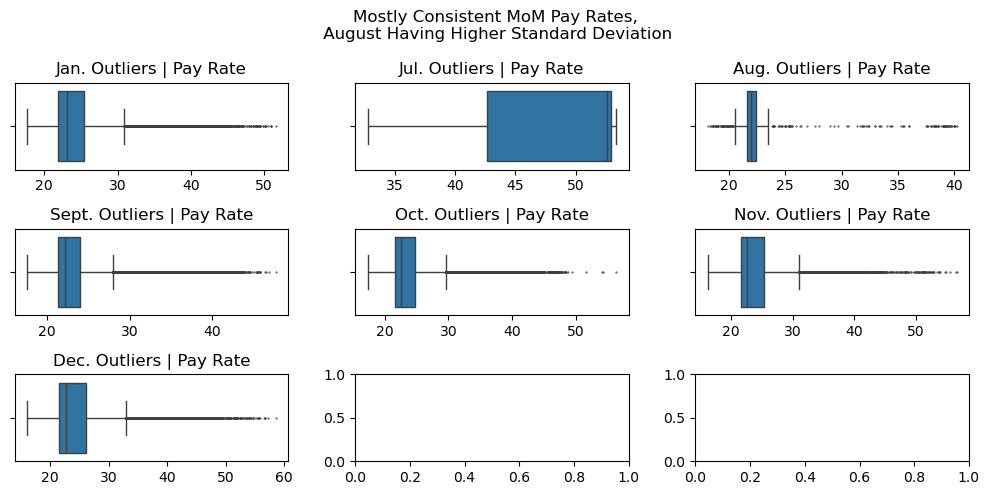

In [140]:
fig, axs = plt.subplots(3,3,figsize=(10,5))
# january
sns.boxplot(ax=axs[0,0], data=df[(df.created_month == 1)], x='pay_rate', fliersize=.5) 
axs[0,0].set_title("Jan. Outliers | Pay Rate")
axs[0,0].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual)

# july
sns.boxplot(ax=axs[0,1], data=df[(df.created_month == 7)], x='pay_rate', fliersize =.5) 
axs[0,1].set_title("Jul. Outliers | Pay Rate")
axs[0,1].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual

# august
sns.boxplot(ax=axs[0,2], data=df[(df.created_month == 8)], x='pay_rate', fliersize =.5) 
axs[0,2].set_title("Aug. Outliers | Pay Rate")
axs[0,2].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual

# september
sns.boxplot(ax=axs[1,0], data=df[(df.created_month == 9)], x='pay_rate', fliersize =.5) 
axs[1,0].set_title("Sept. Outliers | Pay Rate")
axs[1,0].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual

# october
sns.boxplot(ax=axs[1,1], data=df[(df.created_month == 10)], x='pay_rate', fliersize =.5) 
axs[1,1].set_title("Oct. Outliers | Pay Rate")
axs[1,1].set_xlabel("")  # for removing unneeded labeling (inclusion in title & creates cleaner visual

# november
sns.boxplot(ax=axs[1,2], data=df[(df.created_month == 11)], x='pay_rate', fliersize =.5) 
axs[1,2].set_title("Nov. Outliers | Pay Rate")
axs[1,2].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual

# december
sns.boxplot(ax=axs[2,0], data=df[(df.created_month == 12)], x='pay_rate', fliersize =.5) 
axs[2,0].set_title("Dec. Outliers | Pay Rate")
axs[2,0].set_xlabel("") # for removing unneeded labeling (inclusion in title & creates cleaner visual

plt.suptitle('Mostly Consistent MoM Pay Rates,\n August Having Higher Standard Deviation')
plt.tight_layout()

- Median looks consistent among 6/7 plots - July being incongruous.
- Aside from July (posited its plot being due to only 3 created shifts), most other monthly outliers follow the same pattern of an IQR \~22-~25.
    </br>*Why does August:*
    - outlier IQR fall between 20-25?
    - have outliers past the lower limit?
    - due to specific workplaces? if so, what is their behavior in other months?
 

In [141]:
# creating dataframe for august, specifically
aug_df = df[(df.created_month == 8)]
aug_df.shape

(1803, 25)

In [142]:
# split into 25th and 75th percentiles
aug_percentile_75 = aug_df.pay_rate.quantile(0.75)
aug_percentile_25 = aug_df.pay_rate.quantile(0.25)

# calculate iqr
aug_pay_iqr = aug_percentile_75 - aug_percentile_25

# determine upper limit
aug_upper_limit_pay = aug_percentile_75 + 1.5 * aug_pay_iqr

# determine lower limit
aug_lower_limit_pay = aug_percentile_25 - 1.5 * aug_pay_iqr

# storing outliers & printing total number present
aug_outliers_pay_rate = aug_df[(aug_df.pay_rate > aug_upper_limit_pay) | (aug_df.pay_rate < aug_lower_limit_pay)]
print(f'Num. of outliers: {len(aug_outliers_pay_rate)}')

print(f'25th %: {aug_percentile_25}')
print(f'75th %: {aug_percentile_75}')
print(f'Upper Limit: {aug_upper_limit_pay}')
print(f'Lower Limit: {aug_lower_limit_pay}')

Num. of outliers: 163
25th %: 21.65
75th %: 22.4
Upper Limit: 23.525
Lower Limit: 20.525


In [143]:
# aug_lower
aug_lower = aug_df[(aug_df.pay_rate < aug_lower_limit_pay)]

# upper limit
aug_upper = aug_df[(aug_df.pay_rate > aug_upper_limit_pay)]

any patterns amongst workplaces within categorical below/upper groupings? :

In [144]:
# avg. pay rate (below lower limit) by workplace
aug_lower.groupby('workplace_id')[['pay_rate']].mean().sort_values(by=['pay_rate'], ascending=False).reset_index()

,workplace_id,pay_rate
0,5ebf1743a253570017a27d99,20.430000
1,6203e9b58fa46801a9ed5f21,19.902000
2,5e7266e3759cf60016d86c98,19.897500
3,5ebf16f8fe8b200017aebe0f,19.870000
4,637e71fd4a702e01b5e6261b,19.271351


In [145]:
# avg. pay rate (above upper limit) by workplace
aug_upper.groupby('workplace_id')[['pay_rate']].mean().sort_values(by=['pay_rate'], ascending=False).reset_index()

,workplace_id,pay_rate
0,637e71fd4a702e01b5e6261b,37.809333
1,6203e9b58fa46801a9ed5f21,35.322727
2,611af67795f4c501662edb31,34.029000
3,61c4d2a870dd500187dc98b1,32.590000
4,5ff4f626909f7a00160d06fd,31.930000
5,617195fe61cfc6016a47a1de,31.515556
6,628439ec1df59901b9c4f568,30.540000
7,5ebf1743a253570017a27d99,26.821429
8,6564d795a3497ddd40ab079f,25.914286
9,5e7266e3759cf60016d86c98,24.710000


#### MoM Outlier Considerations
- all workplaces that provided below lower limit pay, appear in those that provided pay above the upper limit.
- `6203e9b58fa46801a9ed5f21` comes 2nd in both below avg. pay rate & above avg. pay rate
- `637e71fd4a702e01b5e6261b` comes 5th (last) in below avg. pay rate but 1st in above avg. pay rate

1) Jan Limits:
    - Lower: 21.81 | Upper: 25.46
2) Jul Limits:
    - Lower: 42.66 | Upper: 52.945
3) Aug Limits:
    - Lower: 21.65 | Upper: 22.40
4) Sept Limits:
    - Lower: 21.38 | Upper: 24.01
5) Oct Limits:
    - Lower: 21.62 | Upper: 24.80
6) Nov Limits:
    - Lower: 21.55 | Upper: 25.36
7) Dec Limits:
    - Lower: 21.56 | Upper: 26.15


# **Workplace-Grouped Create, Claim, Delete Frequencies, Deletion Rate**

- **Are there workplaces that delete shifts most often? (related to anchor question 3). More insightful correlation is likely created:deleted by workplace**

*Note*: Monthly reflections are aggregations of 2024-2025 years contained within dataset

In [148]:
# creating new df for workplace counts of shift creations & deletions
workplace_shiftcounts_df = df.groupby(['workplace_id'])[['shift_created_at', 'deleted_at']].count().sort_values(by=['deleted_at'], ascending=False).reset_index()

In [149]:
# num. of unique workplace IDs to use for validating grouping
df.workplace_id.nunique()

132

In [150]:
# validating workplace_shiftcounts_df
print(workplace_shiftcounts_df.shape[0])
workplace_shiftcounts_df.head()

132


,workplace_id,shift_created_at,deleted_at
0,611af67795f4c501662edb31,29671,9858
1,5bdb65eb27415b0004330ace,14843,4909
2,5c06fe1f61d521000488a0f2,17247,4523
3,5ebf09a7fe8b200017aeb9eb,19930,3477
4,5ebf16f8fe8b200017aebe0f,10326,2836


In [151]:
# renaming columns for more accurate representations
workplace_shiftcounts_df = workplace_shiftcounts_df.rename(columns={'shift_created_at' : 'created_count', 'deleted_at' : 'deleted_count'})

In [152]:
# reviewing where deletions are greater than creations
workplace_shiftcounts_df[(workplace_shiftcounts_df.deleted_count > workplace_shiftcounts_df.created_count)]

,workplace_id,created_count,deleted_count


In [153]:
# reviewing % makeup of workplace shifts posted
df.workplace_id.value_counts(normalize=True)

workplace_id
611af67795f4c501662edb31    0.111403
5ebf09a7fe8b200017aeb9eb    0.074829
5c06fe1f61d521000488a0f2    0.064756
5bdb65eb27415b0004330ace    0.055730
5e95d5f5cf5e8d001653314e    0.039754
                              ...   
64c2a4011aaeed08092a7bf6    0.000008
66f6fc534f4d6ca9b9c3254b    0.000008
6463e90ced386e01bbed93ce    0.000004
618eed8692efe30185e5b6c2    0.000004
6256fbc0913ce401ab50f0cf    0.000004
Name: proportion, Length: 132, dtype: float64

#### <ins> Frequency Reviewal - Creation </ins>

In [154]:
# df for created shifts, grouped by workplace
created_df = df.groupby(['workplace_id', 'created_month', 'created_year'])[['shift_id']].count()\
            .rename(columns={'shift_id' : 'num_created_shifts'}).sort_values(by=['num_created_shifts'], ascending=False).reset_index()

created_df.head()

,workplace_id,created_month,created_year,num_created_shifts
0,611af67795f4c501662edb31,10,2024,10651
1,611af67795f4c501662edb31,9,2024,9320
2,5c06fe1f61d521000488a0f2,10,2024,7843
3,5ebf09a7fe8b200017aeb9eb,12,2024,5941
4,611af67795f4c501662edb31,12,2024,5319


Text(0.5, 1.0, 'Monthly Frequency of Shift Creation (Workplace Grouped)')

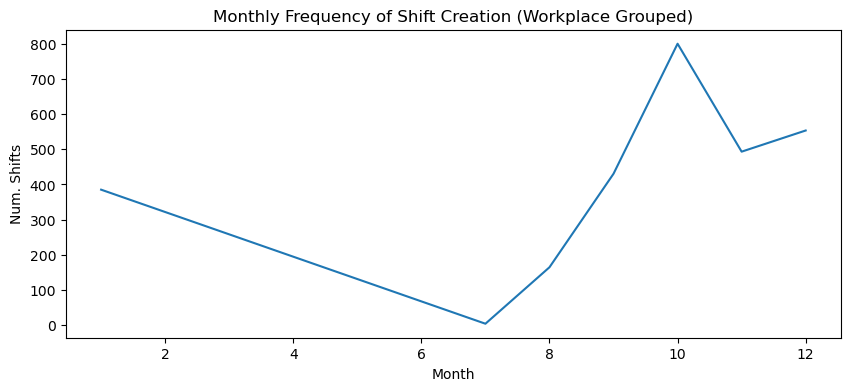

In [155]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(created_df, x='created_month', y='num_created_shifts' , errorbar=None)

plt.xlabel('Month')
plt.ylabel('Num. Shifts')
plt.title('Monthly Frequency of Shift Creation (Workplace Grouped)')

In [156]:
# percentage makeup of shift creations, by month
df.created_month.value_counts(normalize=True)

created_month
10    0.309732
12    0.224491
11    0.174112
9     0.151896
1     0.132988
8     0.006770
7     0.000011
Name: proportion, dtype: float64

#### <ins> Frequency Reviewal - Claim </ins>
- Inquiring into patterns that may or may not align with shift creations/deletions

In [157]:
# df for claimed shifts, grouped by workplace
claimed_df = df.groupby(['workplace_id', 'claimed_month', 'claimed_year'])[['shift_id']].count()\
            .rename(columns={'shift_id' : 'num_claimed_shifts'}).sort_values(by=['num_claimed_shifts'], ascending=False).reset_index()

claimed_df.head()

,workplace_id,claimed_month,claimed_year,num_claimed_shifts
0,611af67795f4c501662edb31,12,2024,361
1,610c3e4bb0d8850166b2bd41,10,2024,333
2,5bdb65eb27415b0004330ace,11,2024,223
3,5bdb65eb27415b0004330ace,12,2024,213
4,5ebf09a7fe8b200017aeb9eb,12,2024,210


Text(0.5, 1.0, 'Monthly Frequency of Shift Claims (Workplace Grouped)')

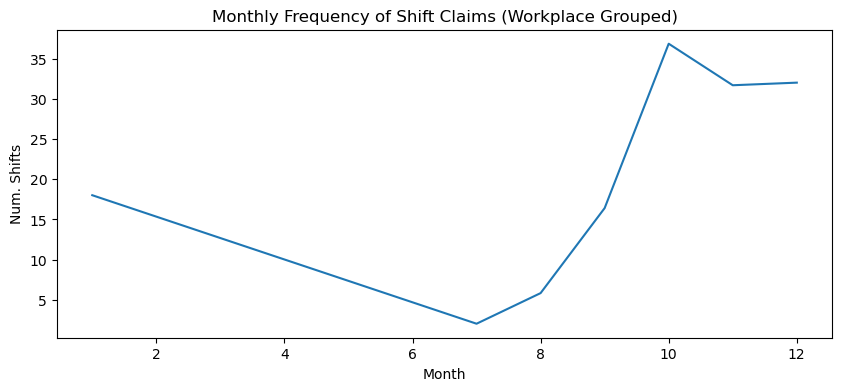

In [158]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(claimed_df, x='claimed_month', y='num_claimed_shifts' , errorbar=None)

plt.xlabel('Month')
plt.ylabel('Num. Shifts')
plt.title('Monthly Frequency of Shift Claims (Workplace Grouped)')

#### <ins> Frequency Reviewal - Deletion </ins>

In [159]:
# df for deleted shifts, grouped by workplace
deleted_df = df.groupby(['workplace_id', 'deleted_month', 'deleted_year'])[['shift_id']].count()\
            .rename(columns={'shift_id' : 'num_deleted_shifts'}).sort_values(by=['num_deleted_shifts'], ascending=False).reset_index()

deleted_df.head()

,workplace_id,deleted_month,deleted_year,num_deleted_shifts
0,611af67795f4c501662edb31,10,2024,4650
1,611af67795f4c501662edb31,11,2024,2217
2,5bdb65eb27415b0004330ace,10,2024,2038
3,5c06fe1f61d521000488a0f2,12,2024,1486
4,5c06fe1f61d521000488a0f2,11,2024,1445


Text(0.5, 1.0, 'Monthly Frequency of Shift Deletion (Workplace Grouped)')

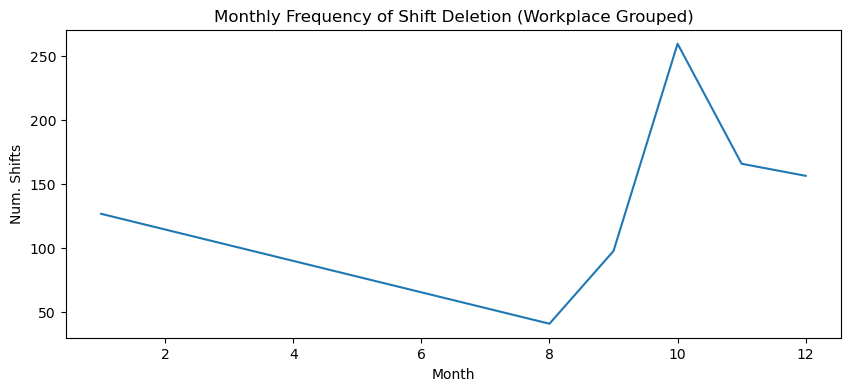

In [160]:
fig, ax = plt.subplots(figsize=(10,4))
sns.lineplot(deleted_df, x='deleted_month', y='num_deleted_shifts' , errorbar=None)

plt.xlabel('Month')
plt.ylabel('Num. Shifts')
plt.title('Monthly Frequency of Shift Deletion (Workplace Grouped)')

In [161]:
# rows where shift created in July, and deleted in August
df[(df.created_month == 7) & (df.deleted_month == 8)]

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour


In [162]:
# rows of deleted shifts that have not been claimed 
df[(df.claimed_at.isna()) & ~(df.deleted_month.isna())].shape[0]

55447

In [163]:
# rows of deleted shifts that have been claimed 
df[~(df.claimed_at.isna()) & ~(df.deleted_month.isna())].shape[0]

197

#### <ins> Deletion Rate </ins>

In [165]:
# creating df to house rate
rate_df = df.groupby('workplace_id')[['shift_created_at', 'deleted_at']].count().copy()

In [166]:
# column for proportion of projects deleted
rate_df['deletion_rate'] = rate_df.deleted_at / (rate_df.shift_created_at + rate_df.deleted_at)

# column for deletion rate
rate_df['delete_create_ratio'] = rate_df.deleted_at / rate_df.shift_created_at

# renaming columns
rate_map = {'shift_created_at' : 'num_created',
            'deleted_at' : 'num_deleted'
           }
rate_df = rate_df.rename(columns=rate_map)

# sorting dataframe by deletion rate
rate_df = rate_df.sort_values(by='deletion_rate', ascending=False).reset_index()

In [202]:
rate_df.head(15)

,workplace_id,num_created,num_deleted,deletion_rate,delete_create_ratio
31,5f4d42e3d621a000165c5cfd,614,612,0.499184,0.996743
69,61b8fee2167e2201801e6b16,17,14,0.451613,0.823529
121,65b953d241782d50f9d43d54,17,13,0.433333,0.764706
46,602ed7d4c778ed00169bf292,127,85,0.400943,0.669291
75,61ddb491f2fac2018a26712a,199,118,0.372240,0.592965
32,5f52a9138c405c0016d30feb,821,445,0.351501,0.542022
120,6564d795a3497ddd40ab079f,68,35,0.339806,0.514706
98,638f685562e61b01b6719d8f,337,156,0.316430,0.462908
47,6081f3fc667fa6016195942c,1118,517,0.316208,0.462433
42,5ff4f626909f7a00160d06fd,1011,455,0.310368,0.450049


#### <ins> Workplace Deletions | Tracking Considerations </ins>
- No workplaces with more shift deletions than creations
- Top 3 workplaces that account for shifts posted:
    1. `611af67795f4c501662edb31` : 0.111403
    2. `5ebf09a7fe8b200017aeb9eb` : 0.074829
    3. `5c06fe1f61d521000488a0f2` : 0.064756
- Top 7 delete:create ratios for workplaces are above 50% - these workplaces are deleting nearly as much as they create, especially the top workplace at very nearly 100%. This only makes up ~.69% of the total dataset, depending on the company's definition of a high deletion:creation, or deletion rate, the reflected total-makeup may shift.
    - Gathering insights into what makes a company delete a shift may ensure that workplaces deleting almost as much as they create doesn't proliferate into the wider user base.
 
*Time-Series*
- July-October timeframe observes sharp increase in created shifts
    - **Should investigate if there are any coinciding frequencies of deletions/claims within the same timeframe**
- August-October timeframe observers sharp increase in deleted shift
    - There is a coinciding decrease with creation & deletion from Jan.-July; with deletions low likely due to the low shift creations. **Is there anything unique about July which doesn't observe the increase in deletions - perhaps due to this being when shifts are first posted and deletions are reflected in August?** *Can review creations in July, with corresponding deletions in August for quantitative check.* {Reviewed and found no records reflecting such an occurrence}
        - No records in dataset where shift created in July and subsequently deleted in August
- Increase in shift claims coincide with increase in shift creations. There is a less severe increase from July-Aug. for claims, when compared to the same timeframe of shift creation, but an increase nonetheless.
    - Deletions also coincide with pattern of shift creations.

#### <ins> Tracking Recs. </ins>
1. Investigate cause of incremental increase in shift deletions during Aug.-Oct. timeframe. E.g., are workplaces overestimating their workforce needs, causing shifts to be subsequently deleted once posted; are there mistakes in posting an issue that aren't able to be corrected without deleting the shift; social reasonings, or any others, for increasing deletions?
2. Increase in shift creations could be correlated with general pattern of sickness increasing as the weather becomes colder - in the same months as the increase is obsrerved - with workplaces needing more workforce to account for any expected increase in patients. An underestimation in the increase of patient population by a workplace may also be attributed to why deletions increase in the same pattern as creation.

# Supplemental Inquiry

## Investigative Question Set | Verified Shifts
1. How many workers are verified *(worker worked shift)* for a shift?
   -  How does this number compare to shifts that have been deleted by a workplace?

#### Verified Shifts

In [168]:
# creating separate DF for verified shifts
verified_df = df[df.is_verified == True]

# printing for num. of verified shifts
verified_df.shape[0]

12649

In [169]:
unique_shifts_df = df.drop_duplicates(subset=['shift_id'])

In [170]:
unique_shifts_df.head()

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
0,6757580b1e2d97752fd69167,65b01f2e46c0645699081cbe,5e7e45243bfbb200165914ae,2024-12-09 23:00:00,2024-12-09 20:50:19,2024-12-09 21:18:42,8,pm,NaT,NaT,...,12,2024,Monday,20,<NA>,<NA>,<NA>,<NA>,NaN,NaN
1,675d37d8a1ca6192a74d23f4,65298a18cc967a5cebbd40b6,5e1ce78827ff480016e9133e,2024-12-14 22:30:00,2024-12-14 07:46:32,2024-12-14 13:19:30,9,pm,NaT,2024-12-14 19:23:43,...,12,2024,Saturday,7,12,2024,<NA>,<NA>,NaN,NaN
2,67550bddd79613f860549322,6696d1c1d0200bf317ee5d3c,626b0b89596c0601c2c39642,2024-12-08 15:00:00,2024-12-08 03:00:46,2024-12-08 4:04:14,6,am,NaT,NaT,...,12,2024,Sunday,3,<NA>,<NA>,<NA>,<NA>,NaN,NaN
3,66f5d05de01fd3697b18c206,66b285d5d0200bf317738e59,5cb9f07135163900163f532c,2024-09-27 14:00:00,2024-09-26 21:21:34,2024-09-27 4:19:45,8,am,NaT,NaT,...,9,2024,Thursday,21,<NA>,<NA>,<NA>,<NA>,NaN,NaN
4,66ee3848e62bb5f43e3baee5,620c6429e2ceb601ad203920,611af67795f4c501662edb31,2024-10-08 21:30:00,2024-09-21 03:06:48,2024-10-06 0:46:37,8,pm,NaT,NaT,...,9,2024,Saturday,3,<NA>,<NA>,<NA>,<NA>,NaN,NaN


In [171]:
# of unique shifts that have been deleted by workplace
unique_shifts_df[~(unique_shifts_df.deleted_at.isna())].shape[0]

3671

##### *Deletion & Unverified Inquiry* 

In [172]:
# records that are both verified and have been deleted by worplace
verified_df[~(verified_df.deleted_at.isna())]

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
95162,67101f8674cbb3ffc03b2835,6001df03fc4eb6001662c503,65428c5eb9ae7bfe06a31fec,2024-10-20,2024-10-16 20:18:14,2024-10-16 20:18:14,12,pm,2024-10-16 20:18:14,2024-10-21 17:21:04,...,10,2024,Wednesday,20,10,2024,10,2024,Wednesday,20.0


In [173]:
# num. of unverified shifts
df[df.is_verified == False].shape[0]

253691

Why are there 253,691 unverified shifts?
- Check records where `canceled_at` is also true
- Check records where `is_ncns` is also true

#### Unverified Shifts

In [174]:
# creating separate DF for unverified shifts
notverified_df = df[df.is_verified == False]

# validating num. of unverified shifts
notverified_df.shape[0]

253691

In [175]:
# prints num of records for canceled shifts  
print(f'Num. Canceled: {notverified_df[~(notverified_df.canceled_at.isna())].shape[0]}')

# prints num. records where workers are ncns
print(f'Num. NCNS: {notverified_df[(notverified_df.is_ncns == True)].shape[0]}')

# prints num. of records that were deleted by workplace
print(f'Num. Workplace Deleted: {notverified_df[~(notverified_df.deleted_at.isna())].shape[0]}')

Num. Canceled: 165
Num. NCNS: 20
Num. Workplace Deleted: 55643


In [176]:
# storing where canceled_at is false
canceled_false = (notverified_df.canceled_at.isna())

# storing where is_ncns is false
ncns_false = (notverified_df.is_ncns != True)

# storing where deleted_at is false
deleted_false = (notverified_df.deleted_at.isna())

In [177]:
# num. of records where cancellation, ncns, and deletion-by-workplace aren't factors
notverified_df[(canceled_false) & (ncns_false) & (deleted_false)].shape[0]

197901

#### <ins> Verified Shifts | Tracking Considerations </ins>
- Shifts Verified: 12,649 (4.749% of dataset)
  
- Shifts Unverified: 253,691 (95.251% of dataset) | (particular worker hasn't worked that shift)
    - 185 records have either been canceled or ncns | .073% of notverified dataset
    - 55,643 records have been deleted by workplace | 21.933% of notverified dataset
    - **What about 197,863 remaining?**
        - 197,901 records where shift wasn't cancelled, no NCNS, and wasn't deleted by workplace. 38 rogue records. *Assumption in cause of discrepancy is due to something with duplicate records, as multiple shifts can correspond with multiple worker_id records. Likely something to confirm with an Engineering team about, and/or perform further investigation but not necessary for current analysis.*
</br>

- One verified record where the shift was deleted after the timestamp for shift_start. shift_id: 67101f8674cbb3ffc03b2835
    - Cadence doesn't occur often, as there is only one verified record where this occurred
- Need to consider accounting for duplicates when performing any statistical analyses
- Correlation matrix to help guide initial inquiries?

#### <ins> Noted Insight </ins>
- 12,649 verified shifts : 3671 deletions by workplace
    - **Are there workplaces that delete shifts most often? (related to anchor question 3). More insightful correlation is likely created:deleted by workplace**

## Investigative Questions Set | Pay & Charge Rate Overall Outliers
2. Any extreme outliers to take notice of?
    - Consider initiating focus on scales of `pay_rate` & `charge_rate`
      - *Any significant magnitudes to take note of?*

Text(0.5, 1.0, 'Outliers: Pay Rate')

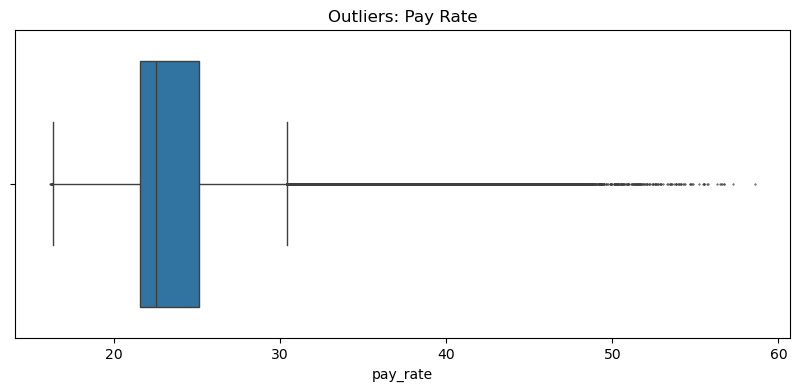

In [178]:
# plotting `pay_rate` boxplot
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(df, x='pay_rate', fliersize = .5)
plt.title('Outliers: Pay Rate')

Text(0.5, 1.0, 'Outliers: Pay Rate Visual-Skew')

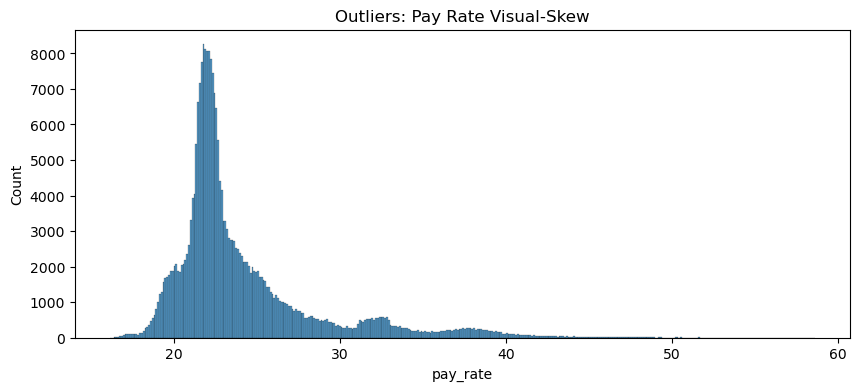

In [179]:
# plotting `pay_rate` histogram for distribution
fig, ax = plt.subplots(figsize=(10,4))
sns.histplot(df, x='pay_rate')
plt.title('Outliers: Pay Rate Visual-Skew')

Text(0.5, 1.0, 'Outliers: Charge Rate')

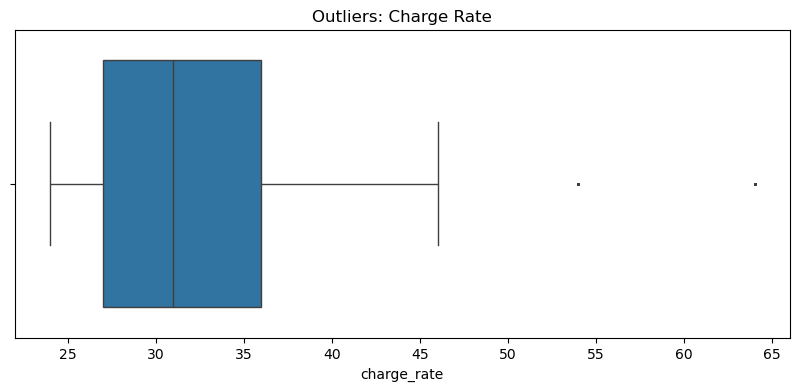

In [180]:
# plotting `charge_rate` boxplot
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(df, x='charge_rate', fliersize = 1)
plt.title('Outliers: Charge Rate')

#### <ins> Extreme Outliers Tracking Considerations </ins>
Pay Rate:
- Outliers both below and above quartiles, especially above. 
- **Why are there so many above upper extreme outliers?**
    - *Gather/Investigate records where rate is an outlier.*
    - Further inquiry into how pay rates are determined would likely help with contextual understanding.
 
Charge Rate:
- Two outliers located above upper quartile

#### <ins> Pay Rate Outliers </ins>

In [181]:
# split into 25th and 75th percentiles
pay_percentile_75 = df.pay_rate.quantile(0.75)
pay_percentile_25 = df.pay_rate.quantile(0.25)

# calculate iqr
pay_iqr = pay_percentile_75 - pay_percentile_25

# determine upper limit
upper_limit_pay = pay_percentile_75 + 1.5 * pay_iqr

# determine lower limit
lower_limit_pay = pay_percentile_25 - 1.5 * pay_iqr

# storing outliers & printing total number present
outliers_pay_rate = df[(df.pay_rate > upper_limit_pay) | (df.pay_rate < lower_limit_pay)]
print(f'Num. of outliers: {len(outliers_pay_rate)}')

Num. of outliers: 28382


In [182]:
# num above upper extreme
df[(df.pay_rate > upper_limit_pay)].shape[0]

28373

In [183]:
# num below lower extreme
df[(df.pay_rate < lower_limit_pay)].shape[0]

9

In [184]:
# reviewing df
outliers_pay_rate.head(1)

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
6,677b553df0e33d9606282ec6,632565c79603d78083c25520,6081f3fc667fa6016195942c,2025-01-06 06:00:00,2025-01-06 03:59:58,2025-01-06 4:13:02,8,noc,NaT,NaT,...,1,2025,Monday,3,<NA>,<NA>,<NA>,<NA>,NaN,NaN


In [185]:
avg_pay = outliers_pay_rate.pay_rate.mean()
median_pay = outliers_pay_rate.pay_rate.median()
mode_pay = outliers_pay_rate.pay_rate.mode()

print(f'Mean: {avg_pay}')
print(f'Median: {median_pay}')
print(f'Mode: {mode_pay}')

Mean: 35.38984567683744
Median: 34.11
Mode: 0    31.93
Name: pay_rate, dtype: float64


<ins> Pay Rate Outliers % Makeup </ins>
- Total 28382 (10.656% of records)
    - above upper extreme: 28373
    - below lower extreme: 9

#### <ins> Charge Rate Outliers </ins>

In [186]:
# split into 25th and 75th percentiles
charge_percentile_75 = df.charge_rate.quantile(0.75)
charge_percentile_25 = df.charge_rate.quantile(0.25)

# calculate iqr
charge_iqr = charge_percentile_75 - charge_percentile_25

# determine upper limit
upper_limit_charge = charge_percentile_75 + 1.5 * charge_iqr

# determine lower limit
lower_limit_charge = charge_percentile_25 - 1.5 * charge_iqr

# storing outliers & printing total number present
outliers_charge_rate = df[(df.charge_rate > upper_limit_charge) | (df.charge_rate < lower_limit_charge)]
print(f'Num. of outliers: {len(outliers_charge_rate)}')

Num. of outliers: 32


In [187]:
avg_charge = outliers_charge_rate.charge_rate.mean()
median_charge = outliers_charge_rate.charge_rate.median()
mode_charge = outliers_charge_rate.charge_rate.mode()

print(f'Mean: {avg_charge}')
print(f'Median: {median_charge}')
print(f'Mode: {mode_charge}')

Mean: 60.25
Median: 64.0
Mode: 0    64
Name: charge_rate, dtype: int64


Charge Rate Outliers % Makeup
- Total 32 (.012% of records)

// To focus on Pay Rate (`pay_rate`), as there is such a small percentage of charge_rate outliers and while it may be capable to ideate on directions for investigating correlating patterns, more attention would reasonably be made in regard to pay_rate; current dataset is correlated more with shifts and users, rather than workplace-focused.

#### **Next Steps**
- Investigate pay_rate ranges that coincide with creation of shifts (*reminder:* claiming of shifts will follow same pattern)
    - Can look at users' patterns of claims with shift pay_rates
    - Jul. - Oct.
    - Nov. - Dec. (smaller increase); will focus on Jul. - Oct. for purposes of this initial analysis so as not to include observed decrease from Oct. - Nov. and have Jul. - Oct. suffice as representative sample.

### Zooming-In to Increase in Shift Creation timing
*Note: This increase was observed in the aggregation by workplace_id*

#### <ins> Observed Increase (July - Oct) DF of Shift Creations </ins>

In [188]:
# storing observed Jul. - Oct. observed increases in df
range_increase_df = df[(df.created_month > 6) & (df.created_month <= 10)].copy()

In [189]:
range_increase_df.shape[0]

124756

In [190]:
range_increase_df.head(2)

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_month,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour
3,66f5d05de01fd3697b18c206,66b285d5d0200bf317738e59,5cb9f07135163900163f532c,2024-09-27 14:00:00,2024-09-26 21:21:34,2024-09-27 4:19:45,8,am,NaT,NaT,...,9,2024,Thursday,21,<NA>,<NA>,<NA>,<NA>,NaN,NaN
4,66ee3848e62bb5f43e3baee5,620c6429e2ceb601ad203920,611af67795f4c501662edb31,2024-10-08 21:30:00,2024-09-21 03:06:48,2024-10-06 0:46:37,8,pm,NaT,NaT,...,9,2024,Saturday,3,<NA>,<NA>,<NA>,<NA>,NaN,NaN


In [191]:
avg_pay_inc = range_increase_df.pay_rate.mean()
median_pay_inc = range_increase_df.pay_rate.median()
mode_pay_inc = range_increase_df.pay_rate.mode()

print(f'Mean: {avg_pay_inc}')
print(f'Median: {median_pay_inc}')
print(f'Mode: {mode_pay_inc}')

Mean: 23.765347317964668
Median: 22.37
Mode: 0    21.99
Name: pay_rate, dtype: float64


#### <ins> Increase Shift Creation (Inc-SC) Pay Rate Outliers </ins>

Text(0.5, 1.0, 'Outliers: Inc-SC Pay Rate')

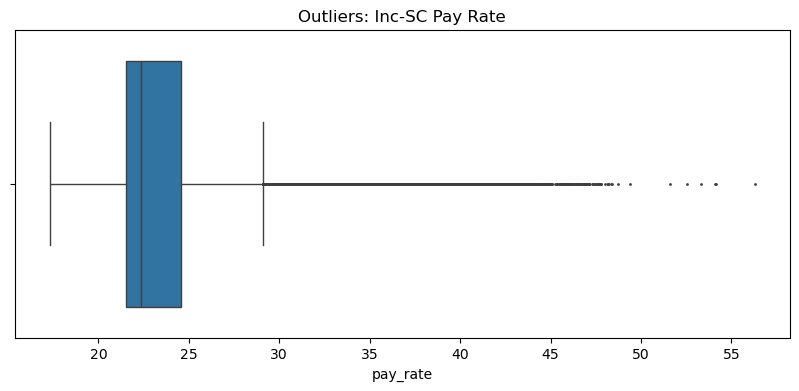

In [192]:
# plotting `charge_rate` boxplot
fig, ax = plt.subplots(figsize=(10,4))
sns.boxplot(range_increase_df, x='pay_rate', fliersize = 1)
plt.title('Outliers: Inc-SC Pay Rate')

In [193]:
# split into 25th and 75th percentiles
inc_percentile_75 = range_increase_df.pay_rate.quantile(0.75)
inc_percentile_25 = range_increase_df.pay_rate.quantile(0.25)

# calculate iqr
inc_iqr = inc_percentile_75 - inc_percentile_25

# determine upper limit
upper_limit_inc = inc_percentile_75 + 1.5 * inc_iqr

# determine lower limit
lower_limit_inc = inc_percentile_25 - 1.5 * inc_iqr

# storing outliers & printing total number present
outliers_inc_pay_rate = range_increase_df[(range_increase_df.pay_rate > upper_limit_inc) | (range_increase_df.pay_rate < lower_limit_inc)]
print(f'Num. of outliers: {len(outliers_inc_pay_rate)}')
print(f'Upper Limit: {upper_limit_inc}')
print(f'Lower Limit: {lower_limit_inc}')

Num. of outliers: 12790
Upper Limit: 29.08
Lower Limit: 17.0


#### <ins> Observed (Shift Creation) Increase Tracking </ins>
- 124,756 total records in Jul. - Oct. timeframe
    - 12,790 *outlier* `pay_rate` records (10.252%) - all above upper extreme of pay rate

#### Possible Story (Deprecated)
*This choice of using this ideation is specific to the circumstance of this case study being done. In "regular circumstance" a question from a stakeholder would be crux of investigation and story told based on findings; this is similar, however with the wide breadth of control given over investigation, a need for clear direction of a possible final story (with flexible paths of investigation) became necessary:*

- There is an increase in creation of shifts during this time -> Most claimed shifts are within this pay range (and possibly claimed faster than shifts in other ranges) -> (possible deletions found are within this pay range for the same timeframe; which (possibly coincide with the shifts that are being claimed most) -> recommendations on pay rate & notices of creations and/or deletions by workplaces.


1. Look at timeframe of increase in creation of shifts (Jul. - Oct.)
</br>->
2. Determine ranges of pay: **Next Step: How to parse/label these into groups?**
    - Not to use mean as a divider, so as to avoid misrepresenting true typical values in the dataset via impact from outliers.
    - Manually categorizing around median, or using pd.qcut() to split into 3 equal quantiles?
    - *Reach out to Data community for thoughts*
4. Observe avg. times of post-to-claim for each grouping
5. Observe num of claims for each grouping
    - *Note: Outliers will likely influence ranges of grouping*
6. Plot claims:pay-groupings
</br>-> 
7. Look at deletions within:
    - Same pay ranges as above
    - Aug. - Oct. timeframe, as July is still in its prior pattern of decrease for deletions. *Ensure anecotal note if depciting*
    - Plot/observe num. of deletions in each pay range
        - Note any connections to claim:pay-groupings previously observed
</br>->
8. Recs.

In [194]:
# assigning quartiles to pay ranges for categorizing
range_increase_df['quartiles_pay_rate'] = pd.qcut(range_increase_df.pay_rate, 4, ['1stQ', '2ndQ', '3rdQ', '4thQ'])

In [195]:
range_increase_df.head(2)

,shift_id,worker_id,workplace_id,shift_start_at,shift_created_at,offer_viewed_at,duration,slot,claimed_at,deleted_at,...,created_year,created_day_name,created_hour,deleted_month,deleted_year,claimed_month,claimed_year,claimed_day_name,claimed_hour,quartiles_pay_rate
3,66f5d05de01fd3697b18c206,66b285d5d0200bf317738e59,5cb9f07135163900163f532c,2024-09-27 14:00:00,2024-09-26 21:21:34,2024-09-27 4:19:45,8,am,NaT,NaT,...,2024,Thursday,21,<NA>,<NA>,<NA>,<NA>,NaN,NaN,1stQ
4,66ee3848e62bb5f43e3baee5,620c6429e2ceb601ad203920,611af67795f4c501662edb31,2024-10-08 21:30:00,2024-09-21 03:06:48,2024-10-06 0:46:37,8,pm,NaT,NaT,...,2024,Saturday,3,<NA>,<NA>,<NA>,<NA>,NaN,NaN,2ndQ
